In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../Dataset/TelcoCustomerChurn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Cleaning & Pre Processing.

In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.drop('customerID',axis=1,inplace=True)
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [6]:
df.duplicated().any()

np.True_

In [7]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [9]:
len(df[df['MonthlyCharges']==" "])

0

In [10]:
df['TotalCharges'].describe()

count     7043
unique    6531
top       20.2
freq        11
Name: TotalCharges, dtype: object

In [11]:
len(df[df['TotalCharges']==" "])


11

In [12]:
# Converting the type of totalcharges column

df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [13]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())
len(df[df['TotalCharges']==" "])

0

In [14]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [15]:
df['Churn']=df['Churn'].apply(lambda x:1 if x=='Yes' else 0)
df['Churn'].value_counts()# imbalance 

Churn
0    5174
1    1869
Name: count, dtype: int64

In [16]:
df['SeniorCitizen']=df['SeniorCitizen'].astype('object')

In [17]:
categorical=list(df.select_dtypes(include=['object']).columns)
numerical=list(df.select_dtypes(include=['number']).columns)

In [18]:
categorical

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [19]:
numerical

['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

In [20]:
numerical.remove('Churn')

# Exploratory Data Analysis

In [21]:
df.describe()

,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928,0.265370
std,24.559481,30.090047,2265.270398,0.441561
min,0.000000,18.250000,18.800000,0.000000
25%,9.000000,35.500000,402.225000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.850000,3786.600000,1.000000
max,72.000000,118.750000,8684.800000,1.000000


calculating features importance

In [22]:
# Average churn rate

global_mean=df['Churn'].mean()
round(global_mean,2)

np.float64(0.27)

In [23]:
#churn by Gender
churn_gender=df.groupby('gender').Churn.mean()
gender_risk= churn_gender/global_mean
gender_risk 
# The differance between rates is small so gender is not important feature

gender
Female    1.014466
Male      0.985807
Name: Churn, dtype: float64

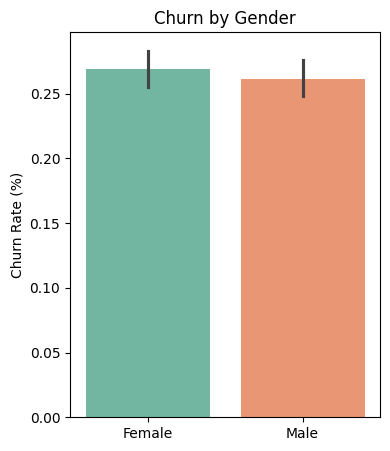

In [24]:
plt.figure(figsize=(4,5))
sns.barplot(data=df, x='gender', y='Churn', hue='gender', palette='Set2', legend=False)
plt.title('Churn by Gender')
plt.xlabel('')
plt.ylabel('Churn Rate (%)')
plt.show()

In [25]:
churn_partner=df.groupby('Partner').Churn.mean()
partner_risk= churn_partner/global_mean
partner_risk
# The differance between rates is not small so Partner is important feature

Partner
No     1.241964
Yes    0.741038
Name: Churn, dtype: float64

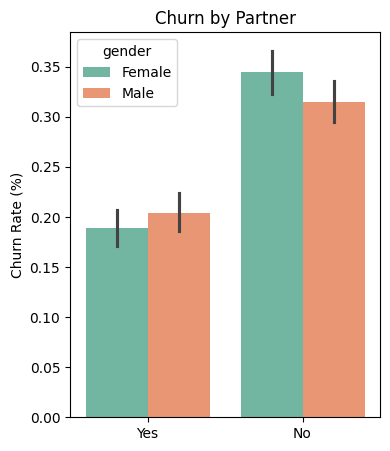

In [26]:
plt.figure(figsize=(4,5))
sns.barplot(data=df, x='Partner', y='Churn', hue='gender', palette='Set2', legend=True)
plt.title('Churn by Partner')
plt.xlabel('')
plt.ylabel('Churn Rate (%)')
plt.show()

Text(0.5, 1.0, 'Corelations')

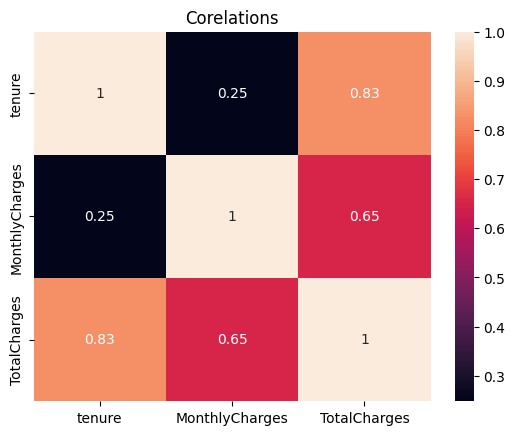

In [27]:
corr_num=df[numerical].corr()
sns.heatmap(corr_num,annot=True)
plt.title("Corelations")

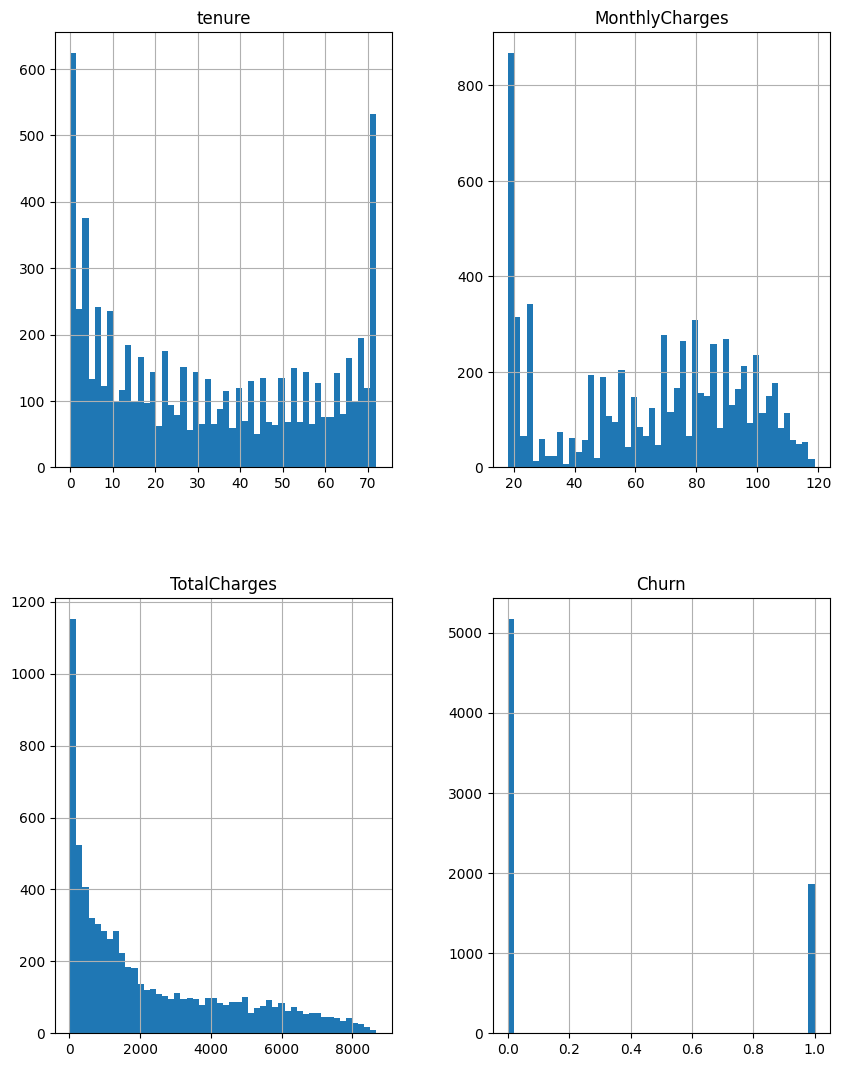

In [28]:
df.hist(bins=50,figsize=(10,13))
plt.show()

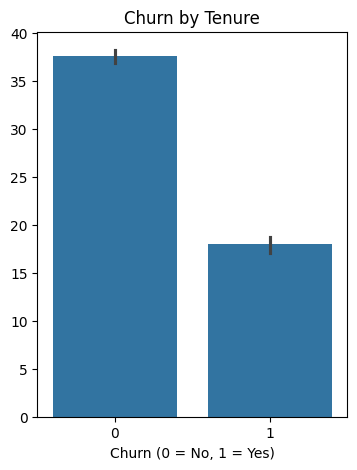

In [29]:
plt.figure(figsize=(4,5))
sns.barplot(data=df, x='Churn', y='tenure')
plt.title('Churn by Tenure')
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel('')
plt.show()

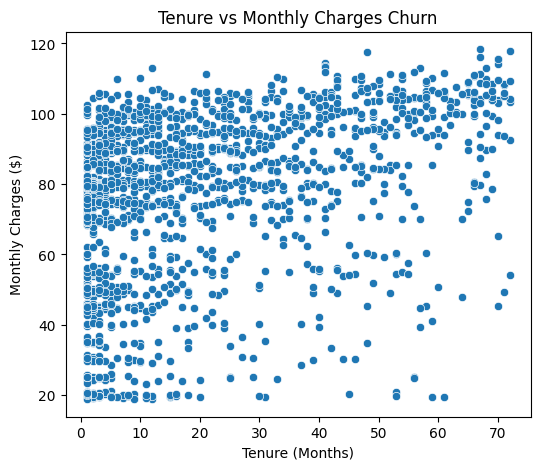

In [36]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    data=df[df['Churn'] == 1],
    x='tenure',
    y='MonthlyCharges',
    legend=False
)
plt.title("Tenure vs Monthly Charges Churn")
plt.xlabel("Tenure (Months)")
plt.ylabel("Monthly Charges ($)")
plt.show()